# Lecture 11: Intro to GIS in Python
ENVR 890-001: Python for Environmental Research, Fall 2020

November 13, 2020

Andrew Hamilton.

### Summary
Many of you are likely familiar with ArcMap, the most popular software for performing geospatial analyses and making maps. In recent years, a growing number of scientists are moving away from ArcMap in favor of free and open-source alternatives such as QGIS, R, and Python. Although some functionalities are currently less well developed than ArcMap, the ability to integrate your geospatial analysis seamlessly within a broader computational workflow (data manipulation, regression, simulation, visualization, etc.) can be quite powerful. 

### Package installation in Anaconda
We will need to install a number of packages in order to do geospatial analysis in Python. Please do the following steps **prior to class if possible**, as it can be quite slow.
1. Open the Anaconda Prompt (not to be confused with the Anaconda Navigator). You should be able to find it using your computer's search function - it will open a black computer terminal.
1. Create a new *Anaconda environment* (a clean slate that we will install packages into) called gis_env using the command: ``conda create -n gis_env``
1. *Activate* the environment using the command: ``conda activate gis_env``
1. Set up a new *channel* for the environment, which tells it where to find packages. Use the two commands: ``conda config --env --add channels conda-forge`` and ``conda config --env --set channel_priority strict``
1. Install standard packages that we will need: ``conda install pandas numpy matplotlib seaborn jupyter ipykernel m2-base``
1. Install special GIS packages: ``conda install -c conda-forge geopandas contextily shapely fiona descartes mapclassify``
1. Tell Python how to access this environment as a *kernel* for Jupyter: ``python -m ipykernel install --user --name=gis_env``
1. Open Jupyter from the Prompt by typing: ``jupyter notebook``
1. Once you have done that, you can change the Kernel within this Jupyter Notebook, by pressing ``Kernel -> Change Kernel -> gis_env`` at the top
1. Next time you want to use the notebook, you will just need to run steps 3 & 8
1. Check that you have everything installed right by running the cell below with all the ``import`` statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

### for custom legends
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

### geopandas, for dealing with shapefiles as Pandas dataframes
import geopandas as gpd
### contextily, for base maps
import contextily as cx

### Data sources
I have provided you with three datasets: 
1. CalEnviroScreen (CES) data, which contains polygons of all the census tracts in California, along with a variety of pollution and demographic data. They also calculate a "CalEnviroScreen Index", which will be highest in regions where environmental pollution overlaps with disadvantaged communities. Find out more here: https://oehha.ca.gov/calenviroscreen/maps-data/download-data
1. California roadways from here: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
1. California major water bodies, along with their assessment as to impairment under the EPA Clean Water Act (303d listing). You can find the data here: https://www.waterboards.ca.gov/water_issues/programs/tmdl/integrated2014_2016.shtml

### Reading, manipulating, and mapping shapefiles with Geopandas package
Geopandas is a package that lets us read spatial data (shapefiles) into Pandas-like objects that are easy to manipulate and create maps with.

In [2]:
### Read in CES data
ces = gpd.read_file('data/ces3shp/CESJune2018Update_SHP/CES3June2018Update.shp')
ces

tract  pop2010     California    ZIP         City   Longitude  \
0     6.083002e+09     3930  Santa Barbara  93454  Santa Maria -120.427059   
1     6.083002e+09    11406  Santa Barbara  93455  Santa Maria -120.478083   
2     6.083002e+09     2084  Santa Barbara  93454  Santa Maria -120.426777   
3     6.083002e+09     4375  Santa Barbara  93455  Santa Maria -120.410028   
4     6.083002e+09     3826  Santa Barbara  93455  Santa Maria -120.427716   
...            ...      ...            ...    ...          ...         ...   
8030  6.037430e+09     5837    Los Angeles  91016     Monrovia -118.003801   
8031  6.037431e+09     4118    Los Angeles  91007      Arcadia -118.058617   
8032  6.037431e+09     6629    Los Angeles  91016     Monrovia -117.997192   
8033  6.037534e+09     6617    Los Angeles  90201         Bell -118.195066   
8034  6.037534e+09     2295    Los Angeles  90201         Bell -118.165790   

       Latitude  CIscore  CIscoreP  ozone  ...  Native_Ame  Asian_Amer  \
0     34.930669    29.51        59  0.035  ...         0.5         7.2   
1     34.928796    33.17        65  0.035  ...         0.2         5.5   
2     34.942111    22.85        45  0.035  ...         0.5         2.9   
3     34.871428     4.45         2  0.035  ...         0.6         4.0   
4     34.872288     5.28         3  0.035  ...         0.8         3.5   
...         ...      ...       ...    ...  ...         ...         ...   
8030  34.153182    18.15        34  0.053  ...         0.2         7.6   
8031  34.130036    15.61        27  0.051  ...         0.2        56.7   
8032  34.136075    40.08        76  0.053  ...         0.2         9.0   
8033  33.972473    57.85        95  0.046  ...         0.1         0.2   
8034  33.971841    62.48        97  0.046  ...         0.4         0.8   

      Other_pct  OBJECTID_1  CIdecile  CIvigintil    Shape_Leng    Shape_Area  \
0           1.6        3507         6          12   6999.357622  2.847611e+06   
1           1.6        2733         7          14  19100.578003  1.635292e+07   
2           2.6        4689         5           9   4970.985933  1.352330e+06   
3           2.6        7864         1           1   6558.956142  2.417717e+06   
4           3.2        7863         1           1   6570.368642  2.608422e+06   
...         ...         ...       ...         ...           ...           ...   
8030        3.1        5252         4           7   7166.130480  1.938016e+06   
8031        2.1        5656         3           6   3941.781794  4.855630e+05   
8032        2.2        1743         8          16   8020.091306  3.015661e+06   
8033        0.9         219        10          20   4949.116845  8.118956e+05   
8034        0.6         223        10          20   4420.126777  5.098718e+05   

                    CES2018_Rn  \
0                       55-60%   
1                       65-70%   
2                       40-45%   
3         1-5% (lowest scores)   
4         1-5% (lowest scores)   
...                        ...   
8030                    30-35%   
8031                    25-30%   
8032                    75-80%   
8033  95-100% (highest scores)   
8034  95-100% (highest scores)   

                                               geometry  
0     POLYGON ((-39795.070 -341919.191, -38126.384 -...  
1     POLYGON ((-39795.070 -341919.191, -39803.632 -...  
2     POLYGON ((-38115.747 -341130.248, -38126.384 -...  
3     POLYGON ((-37341.662 -348530.437, -37252.307 -...  
4     POLYGON ((-39465.107 -348499.262, -38244.305 -...  
...                                                 ...  
8030  POLYGON ((185152.883 -426843.064, 185240.372 -...  
8031  POLYGON ((179874.001 -429709.190, 179885.911 -...  
8032  POLYGON ((184530.476 -428031.241, 184535.255 -...  
8033  POLYGON ((167498.880 -447404.351, 167453.160 -...  
8034  POLYGON ((169695.249 -447290.043, 169560.378 -...  

[8035 rows x 71 columns]

In [3]:
### Look at data columns
ces.columns

Index(['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude',
       'Latitude', 'CIscore', 'CIscoreP', 'ozone', 'ozoneP', 'pm', 'pmP',
       'diesel', 'dieselP', 'drink', 'drinkP', 'pest', 'pestP', 'RSEIhaz',
       'RSEIhazP', 'traffic', 'trafficP', 'cleanups', 'cleanupsP', 'gwthreats',
       'gwthreatsP', 'haz', 'hazP', 'iwb', 'iwbP', 'swis', 'swisP',
       'Pollution', 'PollutionS', 'PollutionP', 'asthma', 'asthmaP', 'lbw',
       'lbwP', 'cvd', 'cvdP', 'edu', 'eduP', 'ling', 'lingP', 'pov', 'povP',
       'unemp', 'unempP', 'housingB', 'housingBP', 'PopChar', 'PopCharSco',
       'PopCharP', 'Children_u', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p',
       'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct',
       'OBJECTID_1', 'CIdecile', 'CIvigintil', 'Shape_Leng', 'Shape_Area',
       'CES2018_Rn', 'geometry'],
      dtype='object')

In [4]:
### Get projection information
ces.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

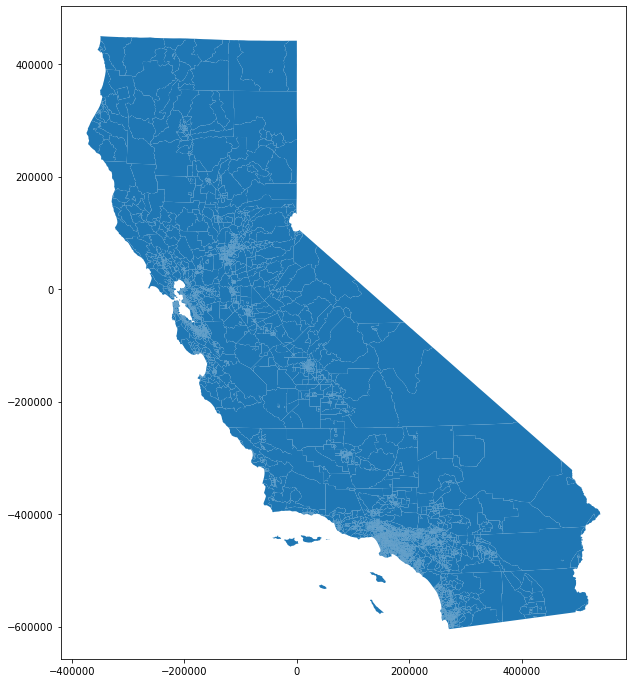

In [5]:
### map data
ces.plot(figsize=(12,12))

<AxesSubplot:>

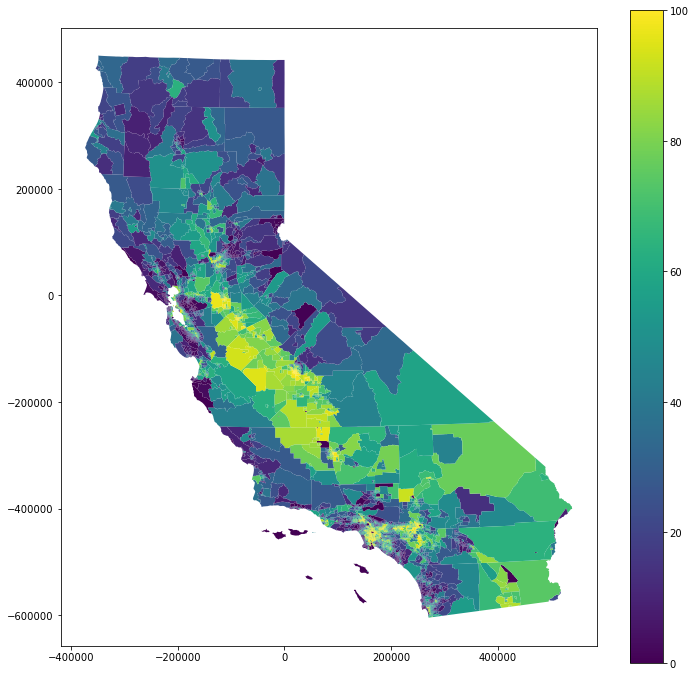

In [6]:
### Use "CIscoreP" column for color. This gives CES Index score as a percentile.
ces.plot(figsize=(12,12), column='CIscoreP', legend=True)

Text(50.375, 0.5, 'Y coordinate (m)')

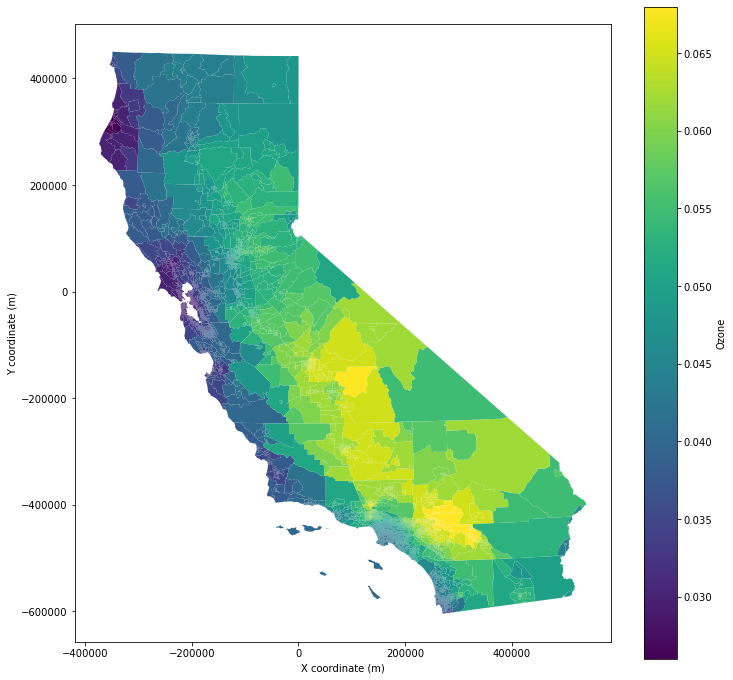

In [7]:
### plot ozone
ces.plot(figsize=(12,12), column='ozone', legend=True, legend_kwds={'label': "Ozone"})
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

Text(102.5755936986956, 0.5, 'Y coordinate (m)')

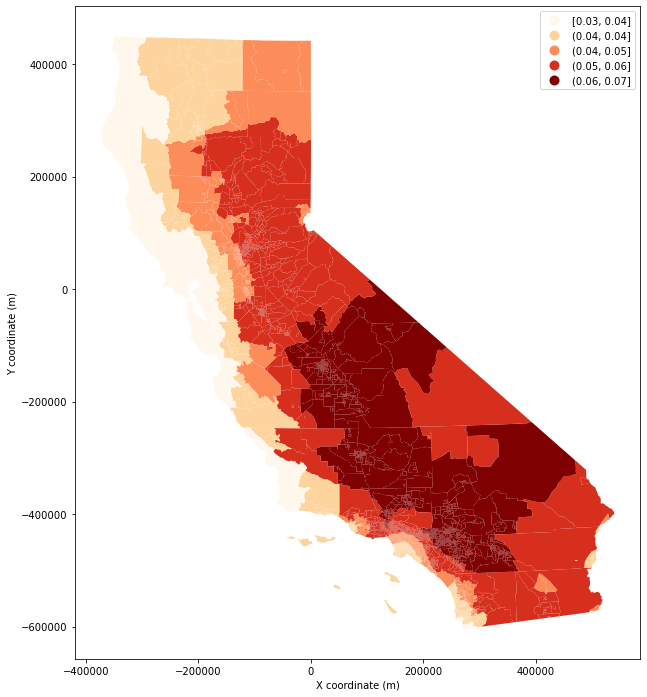

In [8]:
## break into discrete classes for plotting, see more classification options here: https://github.com/pysal/mapclassify
ces.plot(figsize=(12,12), column='ozone', legend=True, 
         cmap = 'OrRd', scheme='JenksCaspall')
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

In [9]:
### now read in roads data
roads = gpd.read_file('data/tl_2019_06_prisecroads/tl_2019_06_prisecroads.shp')
roads

LINEARID       FULLNAME RTTYP  MTFCC  \
0     1108301336873    Brawley Byp     M  S1200   
1     1108296979873     Reeves Byp     M  S1200   
2     1108296282474    Lincoln Byp     M  S1100   
3     1108296281364  Roseville Byp     M  S1100   
4     1108296281294  Roseville Byp     M  S1100   
...             ...            ...   ...    ...   
7398  1105598254770       Ryer Ave     M  S1200   
7399  1104471475589   State Rte 84     S  S1200   
7400  1104471475590   State Rte 84     S  S1200   
7401  1104471474154       Reed Ave     M  S1200   
7402  1104471447341   State Rte 84     S  S1200   

                                               geometry  
0     LINESTRING (-115.50116 32.97863, -115.50117 32...  
1     LINESTRING (-119.91564 36.26536, -119.91558 36...  
2     LINESTRING (-121.29951 38.85805, -121.29952 38...  
3     LINESTRING (-121.30031 38.81831, -121.30032 38...  
4     LINESTRING (-121.30017 38.83067, -121.30017 38...  
...                                                 ...  
7398  LINESTRING (-121.63063 38.31316, -121.63062 38...  
7399  LINESTRING (-121.54237 38.54725, -121.54232 38...  
7400  LINESTRING (-121.52458 38.57550, -121.52441 38...  
7401  LINESTRING (-121.54538 38.59159, -121.54554 38...  
7402  LINESTRING (-121.54538 38.59159, -121.54546 38...  

[7403 rows x 5 columns]

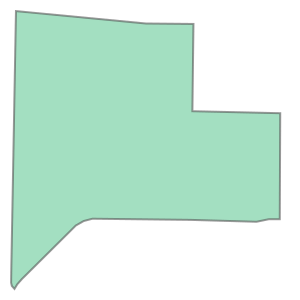

In [12]:
ces['geometry'][1]

In [13]:
roads.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
### project to same projection as ces shapefile
roads = roads.to_crs(ces.crs)
roads.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Text(110.72333303469529, 0.5, 'Y coordinate (m)')

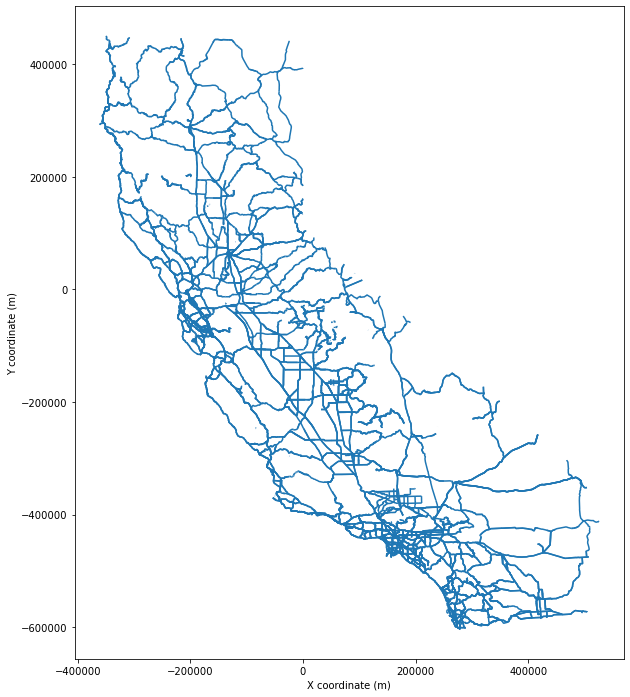

In [15]:
roads.plot(figsize=(12,12))
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

In [16]:
### plot only major roads
roads['MTFCC'].unique()

array(['S1200', 'S1100'], dtype=object)

Text(110.72333303469529, 0.5, 'Y coordinate (m)')

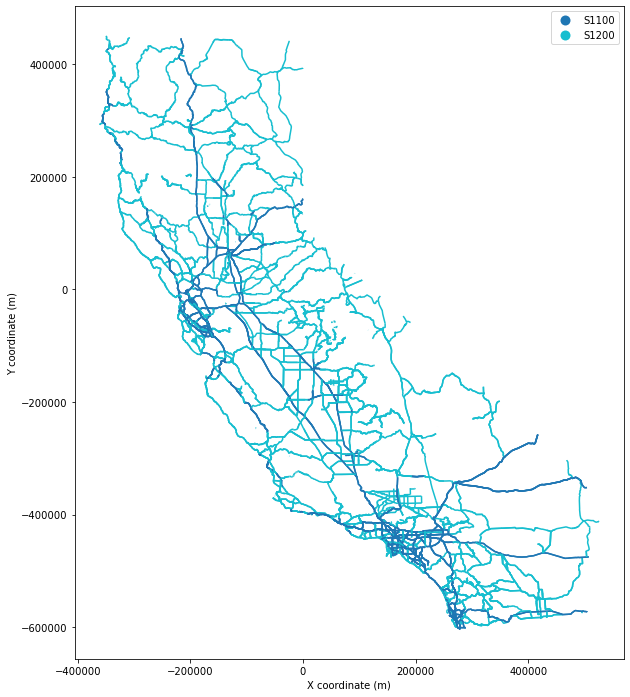

In [17]:
roads.plot(figsize=(12,12), column='MTFCC', legend=True)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

In [18]:
## get primary roads (S1100, see definitions here https://www2.census.gov/geo/pdfs/reference/mtfccs2019.pdf)
roads_prim = roads.loc[roads['MTFCC'] == 'S1100', :]
roads_prim

LINEARID        FULLNAME RTTYP  MTFCC  \
2     1108296282474     Lincoln Byp     M  S1100   
3     1108296281364   Roseville Byp     M  S1100   
4     1108296281294   Roseville Byp     M  S1100   
5     1108296281291   Roseville Byp     M  S1100   
6     1108296282725   Roseville Byp     M  S1100   
...             ...             ...   ...    ...   
7375  1108311419416  el Camino Real     M  S1100   
7382  1108311491603  el Camino Real     M  S1100   
7383  1108296283273      US Hwy 101     U  S1100   
7395  1108311419724    State Rte 23     S  S1100   
7397  1108311419731    State Rte 23     S  S1100   

                                               geometry  
2     LINESTRING (-112653.533 94334.198, -112656.375...  
3     LINESTRING (-112783.026 89918.425, -112785.541...  
4     LINESTRING (-112752.566 91291.855, -112752.610...  
5     LINESTRING (-112730.469 92283.334, -112731.391...  
6     LINESTRING (-112699.211 92286.129, -112699.026...  
...                                                 ...  
7375  LINESTRING (53351.160 -407786.359, 53391.165 -...  
7382  LINESTRING (50168.527 -405018.776, 50150.846 -...  
7383  LINESTRING (74017.958 -418658.552, 73934.845 -...  
7395  LINESTRING (105867.850 -426083.931, 105806.044...  
7397  LINESTRING (105994.112 -426180.038, 105995.412...  

[1229 rows x 5 columns]

Text(116.56187457309048, 0.5, 'Y coordinate (m)')

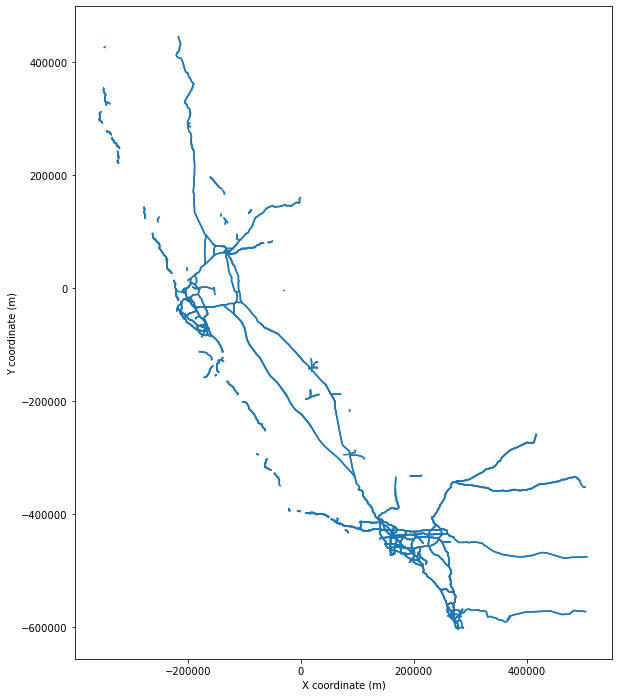

In [19]:
roads_prim.plot(figsize=(12,12))
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

<AxesSubplot:>

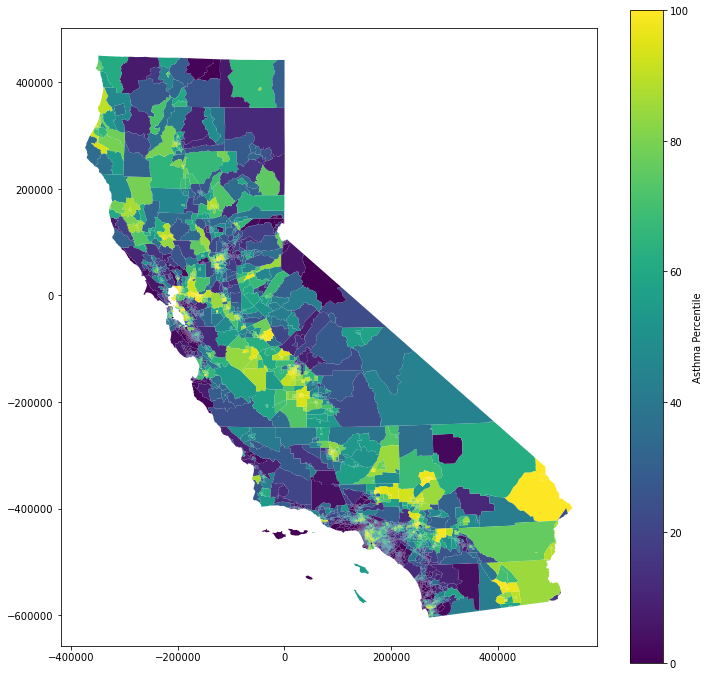

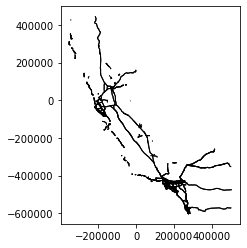

In [20]:
### plotting overlapping maps
ces.plot(figsize=(12,12), column='asthmaP', legend=True, legend_kwds={'label': "Asthma Percentile"})
roads_prim.plot(color='k', lw=1)

Text(50.375, 0.5, 'Y coordinate (m)')

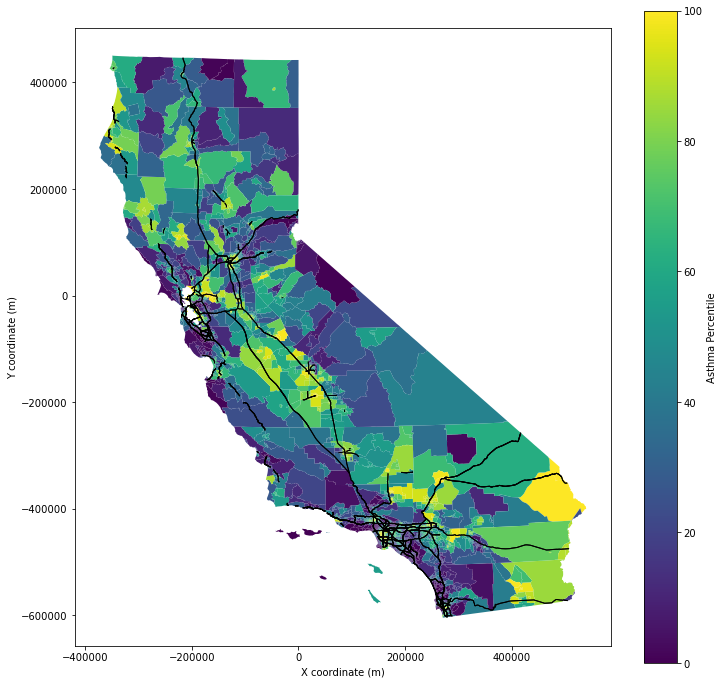

In [21]:
### plotting overlapping maps
ax1 = ces.plot(figsize=(12,12), column='asthmaP', legend=True, legend_kwds={'label': "Asthma Percentile"})
roads_prim.plot(ax = ax1, color='k', lw=1)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

(-610000.0, -390000.0)

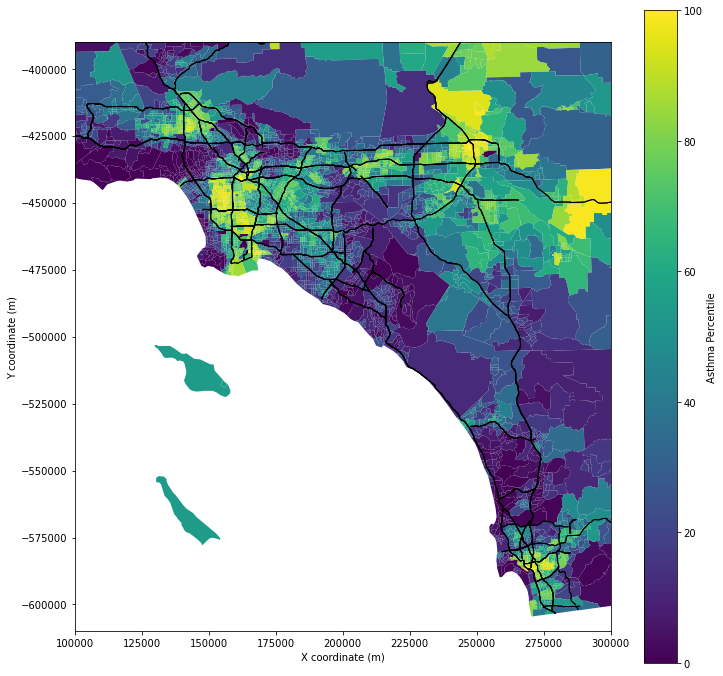

In [22]:
### zoom in on socal
ax1 = ces.plot(figsize=(12,12), column='asthmaP', legend=True, legend_kwds={'label': "Asthma Percentile"})
roads_prim.plot(ax = ax1, color='k', lw=1)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')
plt.xlim([100000, 300000])
plt.ylim([-610000, -390000])

In [23]:
### What if we want to create our own column? We can do it just like in Pandas
ces['nonwhite_percent'] = 100 - ces['White_pct'] 
ces['nonwhite_percentile'] = ces['nonwhite_percent'].rank(pct=True) * 100
ces

tract  pop2010     California    ZIP         City   Longitude  \
0     6.083002e+09     3930  Santa Barbara  93454  Santa Maria -120.427059   
1     6.083002e+09    11406  Santa Barbara  93455  Santa Maria -120.478083   
2     6.083002e+09     2084  Santa Barbara  93454  Santa Maria -120.426777   
3     6.083002e+09     4375  Santa Barbara  93455  Santa Maria -120.410028   
4     6.083002e+09     3826  Santa Barbara  93455  Santa Maria -120.427716   
...            ...      ...            ...    ...          ...         ...   
8030  6.037430e+09     5837    Los Angeles  91016     Monrovia -118.003801   
8031  6.037431e+09     4118    Los Angeles  91007      Arcadia -118.058617   
8032  6.037431e+09     6629    Los Angeles  91016     Monrovia -117.997192   
8033  6.037534e+09     6617    Los Angeles  90201         Bell -118.195066   
8034  6.037534e+09     2295    Los Angeles  90201         Bell -118.165790   

       Latitude  CIscore  CIscoreP  ozone  ...  Other_pct  OBJECTID_1  \
0     34.930669    29.51        59  0.035  ...        1.6        3507   
1     34.928796    33.17        65  0.035  ...        1.6        2733   
2     34.942111    22.85        45  0.035  ...        2.6        4689   
3     34.871428     4.45         2  0.035  ...        2.6        7864   
4     34.872288     5.28         3  0.035  ...        3.2        7863   
...         ...      ...       ...    ...  ...        ...         ...   
8030  34.153182    18.15        34  0.053  ...        3.1        5252   
8031  34.130036    15.61        27  0.051  ...        2.1        5656   
8032  34.136075    40.08        76  0.053  ...        2.2        1743   
8033  33.972473    57.85        95  0.046  ...        0.9         219   
8034  33.971841    62.48        97  0.046  ...        0.6         223   

      CIdecile  CIvigintil    Shape_Leng    Shape_Area  \
0            6          12   6999.357622  2.847611e+06   
1            7          14  19100.578003  1.635292e+07   
2            5           9   4970.985933  1.352330e+06   
3            1           1   6558.956142  2.417717e+06   
4            1           1   6570.368642  2.608422e+06   
...        ...         ...           ...           ...   
8030         4           7   7166.130480  1.938016e+06   
8031         3           6   3941.781794  4.855630e+05   
8032         8          16   8020.091306  3.015661e+06   
8033        10          20   4949.116845  8.118956e+05   
8034        10          20   4420.126777  5.098718e+05   

                    CES2018_Rn  \
0                       55-60%   
1                       65-70%   
2                       40-45%   
3         1-5% (lowest scores)   
4         1-5% (lowest scores)   
...                        ...   
8030                    30-35%   
8031                    25-30%   
8032                    75-80%   
8033  95-100% (highest scores)   
8034  95-100% (highest scores)   

                                               geometry  nonwhite_percent  \
0     POLYGON ((-39795.070 -341919.191, -38126.384 -...              68.7   
1     POLYGON ((-39795.070 -341919.191, -39803.632 -...              82.6   
2     POLYGON ((-38115.747 -341130.248, -38126.384 -...              59.1   
3     POLYGON ((-37341.662 -348530.437, -37252.307 -...              28.1   
4     POLYGON ((-39465.107 -348499.262, -38244.305 -...              34.6   
...                                                 ...               ...   
8030  POLYGON ((185152.883 -426843.064, 185240.372 -...              36.1   
8031  POLYGON ((179874.001 -429709.190, 179885.911 -...              77.3   
8032  POLYGON ((184530.476 -428031.241, 184535.255 -...              85.8   
8033  POLYGON ((167498.880 -447404.351, 167453.160 -...              94.5   
8034  POLYGON ((169695.249 -447290.043, 169560.378 -...              97.8   

      nonwhite_percentile  
0               59.607965  
1               74.019913  
2               50.584941  
3               17.398880  
4               25.127567  


(-610000.0, -390000.0)

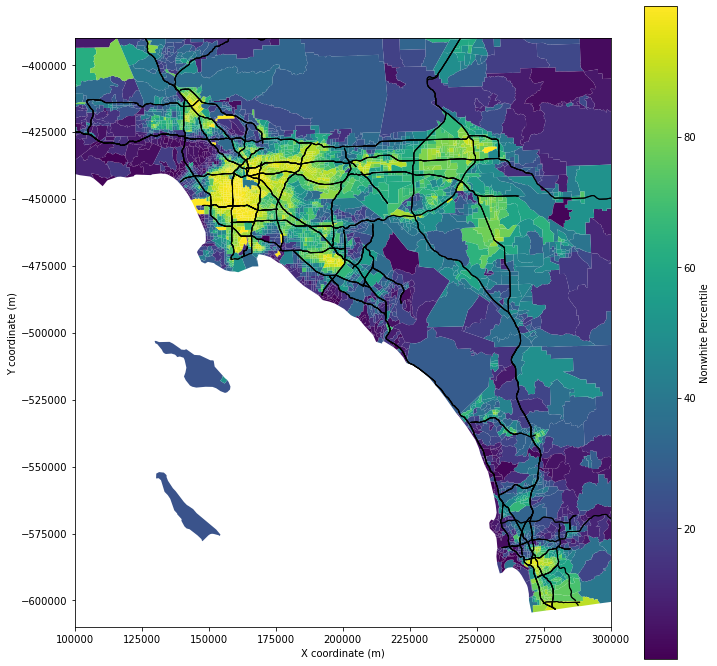

In [24]:
### plot nonwhite percentile
ax1 = ces.plot(figsize=(12,12), column='nonwhite_percentile', legend=True, legend_kwds={'label': "Nonwhite Percentile"})
roads_prim.plot(ax = ax1, color='k', lw=1)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')
plt.xlim([100000, 300000])
plt.ylim([-610000, -390000])

In [28]:
### We can also do correlation, regression, etc. with these geopandas objects, just like pandas
np.corrcoef([ces['nonwhite_percent'], ces['asthma'], ces['CIscoreP']])

array([[1.        , 0.41679699, 0.71129791],
       [0.41679699, 1.        , 0.55124239],
       [0.71129791, 0.55124239, 1.        ]])

In [29]:
lm_pm_nonwhite = sm.ols('asthma ~ nonwhite_percent', data=ces)
lm_pm_nonwhite_fit = lm_pm_nonwhite.fit()
print(lm_pm_nonwhite_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 asthma   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1689.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:22:42   Log-Likelihood:                -38109.
No. Observations:                8035   AIC:                         7.622e+04
Df Residuals:                    8033   BIC:                         7.624e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           24.3456      0.740  

Text(50.375, 0.5, 'Y coordinate (m)')

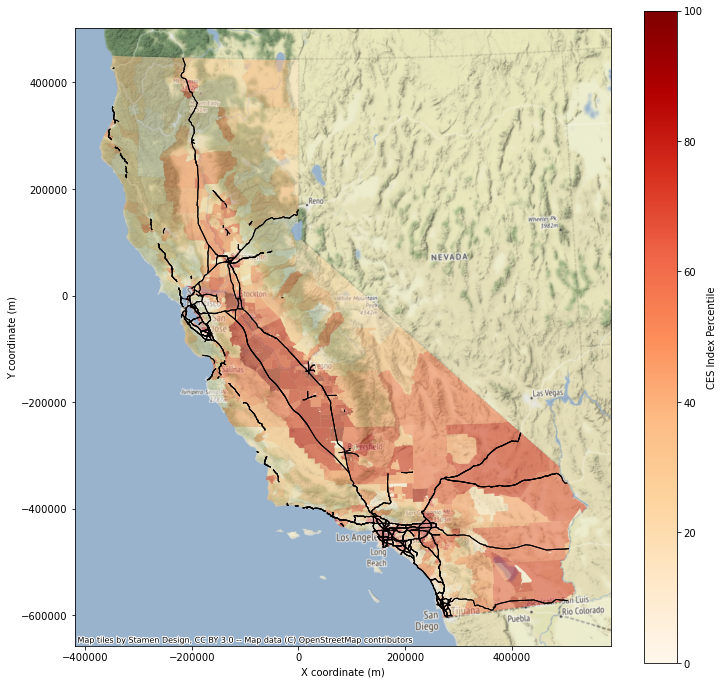

In [30]:
### adding a basemap
ax1 = ces.plot(figsize=(12,12), column='CIscoreP', legend=True, legend_kwds={'label': "CES Index Percentile"}, alpha=0.5, cmap='OrRd')
roads_prim.plot(ax = ax1, color='k', lw=1)
cx.add_basemap(ax = ax1, crs=roads_prim.crs)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

In [31]:
## different basemap providers
cx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [32]:
## different basemap providers
cx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])

Text(50.375, 0.5, 'Y coordinate (m)')

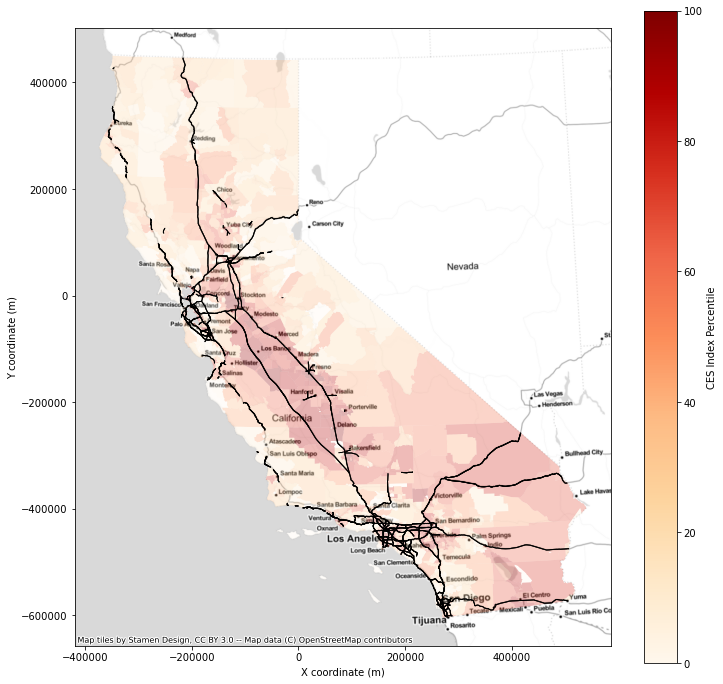

In [33]:
ax1 = ces.plot(figsize=(12,12), column='CIscoreP', legend=True, legend_kwds={'label': "CES Index Percentile"}, alpha=0.3, cmap='OrRd')
roads_prim.plot(ax = ax1, color='k', lw=1)
cx.add_basemap(ax = ax1, crs=roads_prim.crs, source=cx.providers.Stamen.TonerLite)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

In [34]:
### Let's get the top 10% of CES score and plot those areas separately
ces_t10 = ces.loc[ces['CIscoreP'] >= 90, :]
ces_t10

tract  pop2010   California    ZIP       City   Longitude  \
108   6.025012e+09     6232     Imperial  92243  El Centro -115.561293   
109   6.025011e+09     4580     Imperial  92243  El Centro -115.545318   
131   6.025012e+09     7804     Imperial  92231   Calexico -115.514387   
349   6.059012e+09     7955       Orange  92832  Fullerton -117.928633   
455   6.059087e+09     5912       Orange  92805    Anaheim -117.911079   
...            ...      ...          ...    ...        ...         ...   
7966  6.037542e+09     3524  Los Angeles  90221    Compton -118.190616   
7967  6.037542e+09     4114  Los Angeles  90221    Compton -118.196493   
7988  6.037104e+09     4921  Los Angeles  91331    Pacoima -118.429282   
8033  6.037534e+09     6617  Los Angeles  90201       Bell -118.195066   
8034  6.037534e+09     2295  Los Angeles  90201       Bell -118.165790   

       Latitude  CIscore  CIscoreP  ozone  ...  Other_pct  OBJECTID_1  \
108   32.798490    51.87        91  0.055  ...        0.8         424   
109   32.793873    58.13        95  0.055  ...        0.4          44   
131   32.673072    53.14        92  0.053  ...        0.1         425   
349   33.860835    55.69        94  0.046  ...        1.3         699   
455   33.821121    52.58        91  0.046  ...        0.9         703   
...         ...      ...       ...    ...  ...        ...         ...   
7966  33.900837    56.16        94  0.044  ...        0.6         645   
7967  33.901222    51.19        90  0.044  ...        0.5         644   
7988  34.276373    59.68        96  0.057  ...        0.3          58   
8033  33.972473    57.85        95  0.046  ...        0.9         219   
8034  33.971841    62.48        97  0.046  ...        0.6         223   

      CIdecile  CIvigintil    Shape_Leng    Shape_Area  \
108         10          19   6464.206765  2.049230e+06   
109         10          20   8595.409486  3.997026e+06   
131         10          19  10362.302894  5.177034e+06   
349         10          19   4473.881318  1.164043e+06   
455         10          19   5588.490314  1.158176e+06   
...        ...         ...           ...           ...   
7966        10          19   3420.058353  6.158104e+05   
7967        10          19   3451.033690  5.658510e+05   
7988        10          20   5815.145974  1.502641e+06   
8033        10          20   4949.116845  8.118956e+05   
8034        10          20   4420.126777  5.098718e+05   

                    CES2018_Rn  \
108                     90-95%   
109   95-100% (highest scores)   
131                     90-95%   
349                     90-95%   
455                     90-95%   
...                        ...   
7966                    90-95%   
7967                    90-95%   
7988  95-100% (highest scores)   
8033  95-100% (highest scores)   
8034  95-100% (highest scores)   

                                               geometry  nonwhite_percent  \
108   POLYGON ((416520.401 -568551.697, 417151.637 -...              92.5   
109   POLYGON ((417072.492 -571443.135, 417003.988 -...              97.7   
131   POLYGON ((421744.627 -581766.299, 422594.583 -...              98.9   
349   POLYGON ((192101.970 -460209.190, 191806.295 -...              85.0   
455   POLYGON ((192878.063 -463412.645, 192997.850 -...              91.6   
...                                                 ...               ...   
7966  POLYGON ((167441.938 -455022.250, 167455.185 -...              99.5   
7967  POLYGON ((167072.973 -454986.864, 167054.233 -...              99.2   
7988  POLYGON ((143979.528 -415257.506, 143611.336 -...              98.4   
8033  POLYGON ((167498.880 -447404.351, 167453.160 -...              94.5   
8034  POLYGON ((169695.249 -447290.043, 169560.378 -...              97.8   

      nonwhite_percentile  
108             86.322340  
109             94.841319  
131             97.853143  
349             76.614810  
455             84.810205  
...                   ...  
7966            99.5

In [36]:
ces_t10['CIscoreP'].min()

90

Text(79.20408564789187, 0.5, 'Y coordinate (m)')

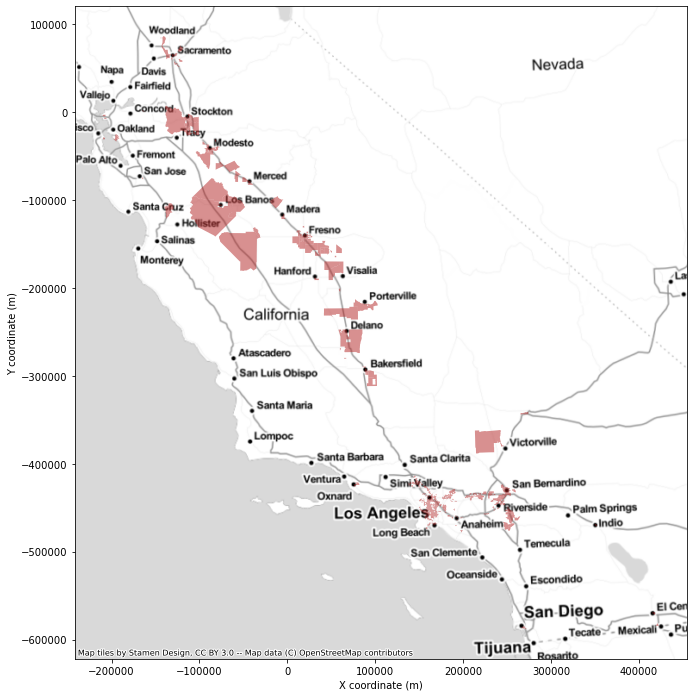

In [37]:
ax1 = ces_t10.plot(figsize=(12,12), color='firebrick', alpha=0.5)
cx.add_basemap(ax = ax1, crs=roads_prim.crs, source=cx.providers.Stamen.TonerLite)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')

In [38]:
### read in CA waterbody data
waters = gpd.read_file('data/IR_1416_Assessed_Lines/IR_1416_Assessed_Lines/IR_1416_Assessed_Lines.shp')
waters

WBID                                       WBNAME  \
0     CAC1132005220081013230607    MacKerricher State Park (near Mill Creek)   
1     CAC1133004520081013235216             Big River Beach at Mendocino Bay   
2     CAC1133004520081029154329                 Caspar Headlands State Beach   
3     CAC1134001420081013231435            Van Damme State Park (beach area)   
4     CAC1138503020081029150443                  Gualala Regional Park Beach   
...                         ...                                          ...   
1962  CAX4051100019990922154626                   Flat Rock Point Beach Area   
1963  CAX4051100019990924085839                           Whites Point Beach   
1964  CAX9091200020021206085938  San Diego Bay Shoreline, Chula Vista Marina   
1965  CAX9101000020020805140653      San Diego Bay Shoreline, Tidelands Park   
1966  CAR3041102020160427053897                           Scott Creek Lagoon   

     REGION_NUM     REGION_NAM  LISTED  EST_SIZE_A SIZE_ASSES INT_REPORT  \
0             1    North Coast       0    1.651750      Miles          1   
1             1    North Coast       1    0.540669      Miles          5   
2             1    North Coast       1    0.088742      Miles          5   
3             1    North Coast       0    0.150835      Miles          1   
4             1    North Coast       0    0.755727      Miles          1   
...         ...            ...     ...         ...        ...        ...   
1962          4    Los Angeles       1    0.120000      Miles         4a   
1963          4    Los Angeles       1    1.110000      Miles         4a   
1964          9      San Diego       1    0.410000      Miles          5   
1965          9      San Diego       1    0.380000      Miles          5   
1966          3  Central Coast       1    0.450000      Miles          5   

     WBTYPE_COD                   WBTYPE   Shape_Leng  \
0             C  Coastal & Bay Shoreline  2658.238874   
1             C  Coastal & Bay Shoreline   870.123621   
2             C  Coastal & Bay Shoreline   142.816626   
3             C  Coastal & Bay Shoreline   242.745630   
4             C  Coastal & Bay Shoreline  1216.227247   
...         ...                      ...          ...   
1962          X  Coastal & Bay Shoreline   191.985033   
1963          X  Coastal & Bay Shoreline  1785.867690   
1964          X  Coastal & Bay Shoreline   656.520840   
1965          X  Coastal & Bay Shoreline   615.402621   
1966       None           River & Stream   726.073803   

                                    GlobalID  \
0     {5E6193D0-CC90-4674-A5B1-FB5F09BC1D6E}   
1     {9344C4E4-9137-443A-B5B0-E42C6E8DB3B0}   
2     {89D1D33A-1597-4CBD-9C86-0CA9B51422F0}   
3     {555FA4B0-0C36-4057-A328-160429020C29}   
4     {57644E85-610D-440F-A568-E12635AFE667}   
...                                      ...   
1962  {274ADAAB-10D4-4FAE-BC86-1860FF00671A}   
1963  {367E2759-73CE-4A81-9630-D979D0BEA20E}   
1964  {51D33F69-8DE9-45E4-8CD2-AF9C48ACB7E8}   
1965  {E6F341D1-581F-40D0-B9B3-11DD09617FC0}   
1966  {A2B265F7-4812-4066-8045-831416955A26}   

                                               geometry  
0     LINESTRING (-324166.704 174755.514, -324154.40...  
1     LINESTRING (-326973.686 149514.712, -327032.52...  
2     LINESTRING (-328551.136 156150.116, -328593.17...  
3     LINESTRING (-326870.024 146282.671, -326827.12...  
4     LINESTRING (-306150.762 87565.555, -306073.579...  
...                                                 ...  
1962  LINESTRING (147406.456 -467509.581, 147368.966...  
1963  LINESTRING (157075.372 -476760.083, 157024.320...  
1964  LINESTRING (272313.728 -594277.577, 272253.948...  
1965  LINESTRING (266248.589 -587413.509, 266247.645...  
1966  LINESTRING (-198154.460 -106088.417, -198148.9...  

[1967 rows x 13 columns]

In [ ]:
waters.crs == ces.crs

In [ ]:
### impaired status under Clean Water Act section 303(d)
waters['INT_REPORT'].unique()

EPA 303(d) list assessment
- 1 - Waters Supporting All Beneficial Uses
- 2 - Waters Supporting Some Beneficial Uses
- 3 - Insufficient Information to Assess Beneficial Uses
- 4a - Waters Being Addresses by USEPA Approved TMDLs (303(d) list category)
- 4b - Waters Being Addressed by Actions Other than TMDLs (303(d)-list category)
- 4c - Waters Impacted by Pollution
- 5 - Waters where standards are not met and a TMDL is required, but not yet completed, for at least one of the listed pollutants for the water body (303(d)-list category)

<AxesSubplot:>

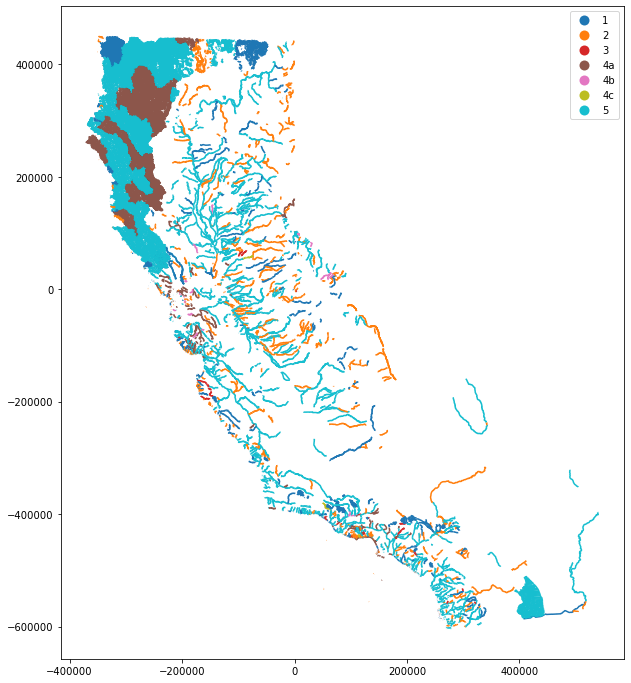

In [39]:
waters.plot(figsize=(12,12), column = 'INT_REPORT', legend=True)

In [40]:
### New column for whether currently on 303d list
waters['status'] = 'unimpaired'
is_listed = [w in ['4a','4b','5'] for w in waters['INT_REPORT']]
is_listed

[False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False

In [41]:
waters['status'][is_listed] = 'impaired'
waters['status']

C:\Users\Andrew\anaconda3\envs\gis_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       unimpaired
1         impaired
2         impaired
3       unimpaired
4       unimpaired
           ...    
1962      impaired
1963      impaired
1964      impaired
1965      impaired
1966      impaired
Name: status, Length: 1967, dtype: object

Text(88.66590909090914, 0.5, 'Y coordinate (m)')

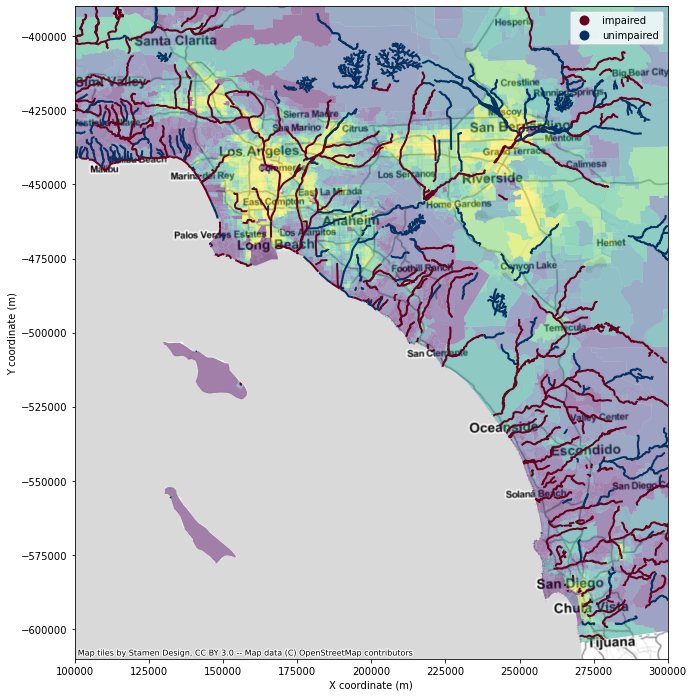

In [42]:
### plot impaired water bodies along with CES index percentile
ax1 = ces.plot(figsize=(12,12), column='CIscoreP', alpha=0.5)
plt.xlim([100000, 300000])
plt.ylim([-610000, -390000])
waters.plot(ax = ax1, column = 'status', cmap='RdBu', lw=2, legend=True)
cx.add_basemap(ax = ax1, crs=roads_prim.crs, source=cx.providers.Stamen.TonerLite)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')


In [43]:
### Can we associate river reaches with CES index?
## spatial join
waters_join_ces = gpd.sjoin(waters, ces, how='left', op='intersects')
waters_join_ces.columns

Index(['WBID', 'WBNAME', 'REGION_NUM', 'REGION_NAM', 'LISTED', 'EST_SIZE_A',
       'SIZE_ASSES', 'INT_REPORT', 'WBTYPE_COD', 'WBTYPE', 'Shape_Leng_left',
       'GlobalID', 'geometry', 'status', 'index_right', 'tract', 'pop2010',
       'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore',
       'CIscoreP', 'ozone', 'ozoneP', 'pm', 'pmP', 'diesel', 'dieselP',
       'drink', 'drinkP', 'pest', 'pestP', 'RSEIhaz', 'RSEIhazP', 'traffic',
       'trafficP', 'cleanups', 'cleanupsP', 'gwthreats', 'gwthreatsP', 'haz',
       'hazP', 'iwb', 'iwbP', 'swis', 'swisP', 'Pollution', 'PollutionS',
       'PollutionP', 'asthma', 'asthmaP', 'lbw', 'lbwP', 'cvd', 'cvdP', 'edu',
       'eduP', 'ling', 'lingP', 'pov', 'povP', 'unemp', 'unempP', 'housingB',
       'housingBP', 'PopChar', 'PopCharSco', 'PopCharP', 'Children_u',
       'Pop_11_64_', 'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am',
       'Native_Ame', 'Asian_Amer', 'Other_pct', 'OBJECTID_1', 'CIdecile',
       'CIvigintil

In [45]:
waters.shape

(1967, 14)

In [44]:
waters_join_ces.shape

(5893, 87)

Text(50.375, 0.5, 'Y coordinate (m)')

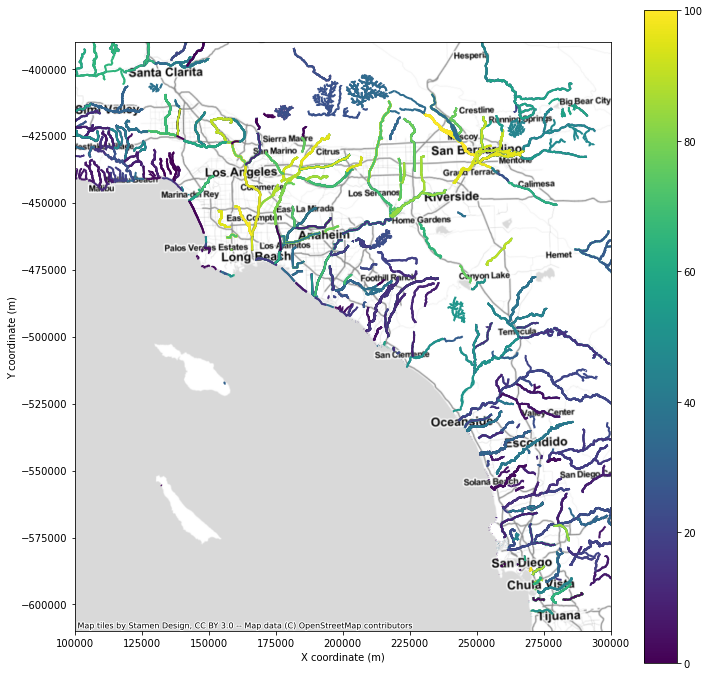

In [46]:
### plot river reaches with CES as the color
### plot impaired water bodies along with CES index percentile
ax1 = ces.plot(figsize=(12,12), column='CIscoreP', alpha=0)
plt.xlim([100000, 300000])
plt.ylim([-610000, -390000])
waters_join_ces.plot(ax = ax1, column = 'CIscoreP', lw=2, legend=True)
cx.add_basemap(ax = ax1, crs=roads_prim.crs, source=cx.providers.Stamen.TonerLite)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')


In [47]:
### get a list of the impaired waters within top 90%ile CES
waters_join_ces_imp = waters_join_ces.loc[waters_join_ces['status'] == 'impaired']
waters_join_ces_imp

WBID                                       WBNAME  \
1     CAC1133004520081013235216             Big River Beach at Mendocino Bay   
2     CAC1133004520081029154329                 Caspar Headlands State Beach   
7     CAC1081001220070319154339                        Moonstone County Park   
10    CAC1081001220070319155307                            Luffenholtz Beach   
13    CAC1132004120081013222913                             Hare Creek Beach   
...                         ...                                          ...   
1963  CAX4051100019990924085839                           Whites Point Beach   
1963  CAX4051100019990924085839                           Whites Point Beach   
1964  CAX9091200020021206085938  San Diego Bay Shoreline, Chula Vista Marina   
1965  CAX9101000020020805140653      San Diego Bay Shoreline, Tidelands Park   
1966  CAR3041102020160427053897                           Scott Creek Lagoon   

     REGION_NUM     REGION_NAM  LISTED  EST_SIZE_A SIZE_ASSES INT_REPORT  \
1             1    North Coast       1    0.540669      Miles          5   
2             1    North Coast       1    0.088742      Miles          5   
7             1    North Coast       1    0.175885      Miles          5   
10            1    North Coast       1    0.109178      Miles          5   
13            1    North Coast       1    0.183432      Miles          5   
...         ...            ...     ...         ...        ...        ...   
1963          4    Los Angeles       1    1.110000      Miles         4a   
1963          4    Los Angeles       1    1.110000      Miles         4a   
1964          9      San Diego       1    0.410000      Miles          5   
1965          9      San Diego       1    0.380000      Miles          5   
1966          3  Central Coast       1    0.450000      Miles          5   

     WBTYPE_COD                   WBTYPE  ...  Asian_Amer Other_pct  \
1             C  Coastal & Bay Shoreline  ...         1.2       3.1   
2             C  Coastal & Bay Shoreline  ...         1.2       3.1   
7             C  Coastal & Bay Shoreline  ...         1.1       3.8   
10            C  Coastal & Bay Shoreline  ...         1.1       3.8   
13            C  Coastal & Bay Shoreline  ...         1.2       3.1   
...         ...                      ...  ...         ...       ...   
1963          X  Coastal & Bay Shoreline  ...         4.6       3.7   
1963          X  Coastal & Bay Shoreline  ...         5.4       3.9   
1964          X  Coastal & Bay Shoreline  ...         3.9       2.1   
1965          X  Coastal & Bay Shoreline  ...         5.3       3.0   
1966       None           River & Stream  ...         1.9       3.1   

     OBJECTID_1 CIdecile  CIvigintil  Shape_Leng_right    Shape_Area  \
1        6466.0      2.0         4.0     102890.395019  2.597346e+08   
2        6466.0      2.0         4.0     102890.395019  2.597346e+08   
7        5988.0      3.0         5.0     162641.081145  6.344388e+08   
10       5988.0      3.0         5.0     162641.081145  6.344388e+08   
13       6466.0      2.0         4.0     102890.395019  2.597346e+08   
...         ...      ...         ...               ...           ...   
1963     4058.0      5.0        10.0       6217.072787  2.223905e+06   
1963     5641.0      3.0         6.0       6152.107479  1.439463e+06   
1964     1919.0      8.0        16.0      11231.178899  7.146291e+06   
1965     7357.0      1.0         2.0       4627.350020  8.898443e+05   
1966     6686.0      2.0         4.0      92234.675285  2.921695e+08   

     CES2018_Rn  nonwhite_percent nonwhite_percentile  
1        15-20%              11.5            1.169882  
2        15-20%              11.5            1.169882  
7        20-25%              16.2            4.474175  
10       20-25%              16.2            4.474175  
13       15-20%              11.5            1.169882  
...         ...               ...                 ...  
1963     45-50%              40.5          

In [48]:
### sorting (just because we haven't done it before)
waters_join_ces_imp_sortCI = waters_join_ces_imp.sort_values(by=['CIscoreP','asthma'], ascending=False)
waters_join_ces_imp_sortCI['CIscoreP'][:50]

1532    100.0
716     100.0
716     100.0
1169    100.0
716     100.0
1532    100.0
957     100.0
900     100.0
1221    100.0
1689    100.0
1221    100.0
1689    100.0
1532    100.0
1221    100.0
923     100.0
900     100.0
722      99.0
1471     99.0
1471     99.0
1943     99.0
1906     99.0
1109     99.0
1906     99.0
957      99.0
1098     99.0
1169     99.0
900      99.0
1168     99.0
1221     99.0
1221     99.0
1330     99.0
1070     99.0
1680     99.0
900      99.0
1680     99.0
1070     99.0
1679     99.0
1471     98.0
1168     98.0
652      98.0
1338     98.0
1093     98.0
1532     98.0
1689     98.0
862      98.0
969      98.0
1677     98.0
1532     98.0
898      98.0
1651     98.0
Name: CIscoreP, dtype: float64

In [49]:
waters_join_ces_imp_t10 = waters_join_ces_imp_sortCI.loc[waters_join_ces_imp_sortCI['CIscoreP'] >= 90, :]
waters_join_ces_imp_t10

WBID  \
1532  CAR5313000020021209142456   
716   CAR5313000020000209130407   
716   CAR5313000020000209130407   
1169  CAR8015200020080921202752   
716   CAR5313000020000209130407   
...                         ...   
1416  CAR5581000020080808211103   
1479  CAR5581000020020627102603   
1386  CAR4052100019990202134403   
582   CAR4053100020110601150056   
1013  CAR4053100020110724104009   

                                                 WBNAME REGION_NUM  \
1532  Mormon Slough (Stockton Diverting Canal to Com...          5   
716   Mormon Slough (Commerce Street to Stockton Dee...          5   
716   Mormon Slough (Commerce Street to Stockton Dee...          5   
1169                                         Warm Creek          8   
716   Mormon Slough (Commerce Street to Stockton Dee...          5   
...                                                 ...        ...   
1416            Cross Creek (Kings and Tulare Counties)          5   
1479      Kaweah River, Lower (includes St Johns River)          5   
1386                            Burbank Western Channel          4   
582         Rio Hondo Reach 3 (above Spreading Grounds)          4   
1013                                      Alhambra Wash          4   

          REGION_NAM  LISTED  EST_SIZE_A SIZE_ASSES INT_REPORT WBTYPE_COD  \
1532  Central Valley       1        5.18      Miles          5          R   
716   Central Valley       1        0.93      Miles          5          R   
716   Central Valley       1        0.93      Miles          5          R   
1169       Santa Ana       1        7.18      Miles          5          R   
716   Central Valley       1        0.93      Miles          5          R   
...              ...     ...         ...        ...        ...        ...   
1416  Central Valley       1       32.36      Miles          5          R   
1479  Central Valley       1       26.75      Miles          5          R   
1386     Los Angeles       1       13.17      Miles          5          R   
582      Los Angeles       1        8.07      Miles          5          R   
1013     Los Angeles       1        6.87      Miles          5          R   

              WBTYPE  ...  Asian_Amer Other_pct OBJECTID_1 CIdecile  \
1532  River & Stream  ...        11.9       3.1      357.0     10.0   
716   River & Stream  ...         9.9       4.1      358.0     10.0   
716   River & Stream  ...        20.9       2.8      361.0     10.0   
1169  River & Stream  ...         6.7       1.9      342.0     10.0   
716   River & Stream  ...        14.3       2.2      360.0     10.0   
...              ...  ...         ...       ...        ...      ...   
1416  River & Stream  ...         1.6       1.4     1185.0      9.0   
1479  River & Stream  ...         1.6       1.4     1185.0      9.0   
1386  River & Stream  ...        12.4       2.9      949.0      9.0   
582   River & Stream  ...        58.6       1.0      978.0      9.0   
1013  River & Stream  ...        58.6       1.0      978.0      9.0   

      CIvigintil  Shape_Leng_right    Shape_Area                CES2018_Rn  \
1532        20.0       6317.093080  1.861548e+06  95-100% (highest scores)   
716         20.0       6514.435552  1.469839e+06  95-100% (highest scores)   
716         20.0      13332.120298  9.414569e+06  95-100% (highest scores)   
1169        20.0       8745.994854  3.483829e+06  95-100% (highest scores)   
716         20.0       6386.131138  1.816741e+06  95-100% (highest scores)   
...          ...               ...           ...                       ...   
1416        18.0      74922.904435  1.826157e+08                    85-90%   
1479        18.0      74922.904435  1.826157e+08                    85-90%   
1386        18.0       3796.599818  8.264646e+05                    85-90%   
582         18.0      11220.897788  3.472397e+06                    85-90%   
1013        18.0      11220.897788  3.472397e+06                    85-90%   

      nonwhite_percent nonwhite_percentile  
1532 

Text(88.66590909090914, 0.5, 'Y coordinate (m)')

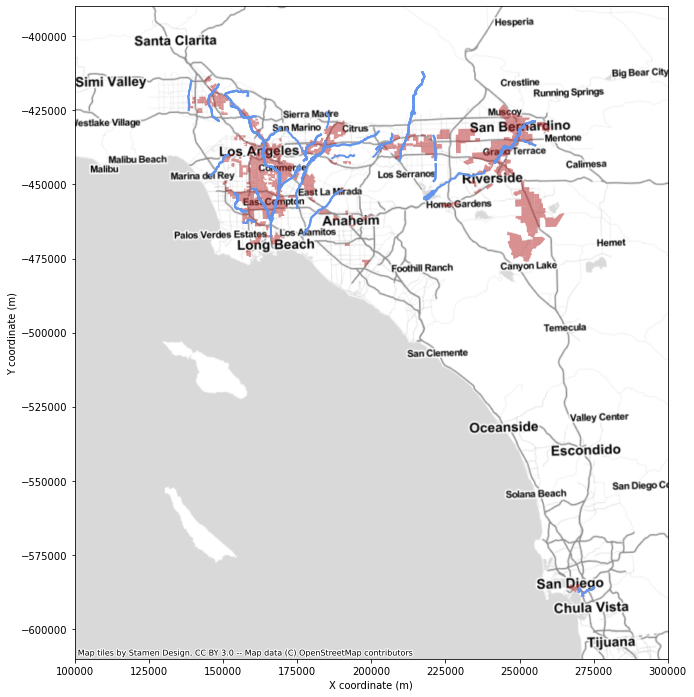

In [50]:
### plot top 10 percentile CES zones along with their impaired rivers
ax1 = ces_t10.plot(figsize=(12,12), color='firebrick', alpha=0.5)
plt.xlim([100000, 300000])
plt.ylim([-610000, -390000])
cx.add_basemap(ax = ax1, crs=roads_prim.crs, source=cx.providers.Stamen.TonerLite)
waters_join_ces_imp_t10.plot(ax = ax1, lw=2, color='cornflowerblue')
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')


In [51]:
### what if we only want the river segment that is actually inside the t10 polygon, and we want to focus on LA county?
ces_t10_la = ces_t10.loc[ces_t10['California'] == 'Los Angeles', :]
waters_join_ces_imp_t10_int_la = gpd.overlay(waters_join_ces_imp_t10, ces_t10_la, how='intersection')
waters_join_ces_imp_t10_int_la

WBID  \
0    CAR4051501019990202111430   
1    CAR4051501019990202085021   
2    CAR4051501019990202085021   
3    CAR4051501019990202111430   
4    CAR4051501019990202085021   
..                         ...   
667  CAR4051501019980917150749   
668  CAR4051501019980917150749   
669  CAR4051501019980917150749   
670  CAR4051501019980917150749   
671  CAR4053100020081117111726   

                                                WBNAME REGION_NUM  \
0                                        Compton Creek          4   
1    Los Angeles River Reach 2 (Carson to Figueroa ...          4   
2    Los Angeles River Reach 2 (Carson to Figueroa ...          4   
3                                        Compton Creek          4   
4    Los Angeles River Reach 2 (Carson to Figueroa ...          4   
..                                                 ...        ...   
667  San Gabriel River Reach 2 (Firestone to Whitti...          4   
668  San Gabriel River Reach 2 (Firestone to Whitti...          4   
669  San Gabriel River Reach 2 (Firestone to Whitti...          4   
670  San Gabriel River Reach 2 (Firestone to Whitti...          4   
671                                       Puente Creek          4   

      REGION_NAM  LISTED  EST_SIZE_A SIZE_ASSES INT_REPORT WBTYPE_COD  \
0    Los Angeles       1        8.51      Miles          5          R   
1    Los Angeles       1       18.80      Miles          5          R   
2    Los Angeles       1       18.80      Miles          5          R   
3    Los Angeles       1        8.51      Miles          5          R   
4    Los Angeles       1       18.80      Miles          5          R   
..           ...     ...         ...        ...        ...        ...   
667  Los Angeles       1       13.94      Miles          5          R   
668  Los Angeles       1       13.94      Miles          5          R   
669  Los Angeles       1       13.94      Miles          5          R   
670  Los Angeles       1       13.94      Miles          5          R   
671  Los Angeles       1        5.77      Miles          5          R   

             WBTYPE  ...  Other_pct_2 OBJECTID_1_2 CIdecile_2  CIvigintil_2  \
0    River & Stream  ...          2.4          283         10            20   
1    River & Stream  ...          2.4          283         10            20   
2    River & Stream  ...          2.4          283         10            20   
3    River & Stream  ...          2.4          283         10            20   
4    River & Stream  ...          2.4          283         10            20   
..              ...  ...          ...          ...        ...           ...   
667  River & Stream  ...          1.4          650         10            19   
668  River & Stream  ...          1.4          650         10            19   
669  River & Stream  ...          0.8          592         10            19   
670  River & Stream  ...          0.8          592         10            19   
671  River & Stream  ...          0.4          573         10            19   

      Shape_Leng  Shape_Area_2              CES2018_Rn_2  nonwhite_percent_2  \
0    7493.588092  1.912255e+06  95-100% (highest scores)                91.0   
1    7493.588092  1.912255e+06  95-100% (highest scores)                91.0   
2    7493.588092  1.912255e+06  95-100% (highest scores)                91.0   
3    7493.588092  1.912255e+06  95-100% (highest scores)                91.0   
4    7493.588092  1.912255e+06  95-100% (highest scores)                91.0   
..           ...           ...                       ...                 ...   
667  7158.654219  2.218783e+06                    90-95%                82.6   
668  7158.654219  2.218783e+06                    90-95%                82.6   
669  5799.184336  1.767890e+06                    90-95%                89.5   
670  5799.184336  1.767890e+06                    90-95%                89.5   
671  6433.949895  1.457521e+06                    90-95%                95.1   

 

Text(50.375, 0.5, 'Y coordinate (m)')

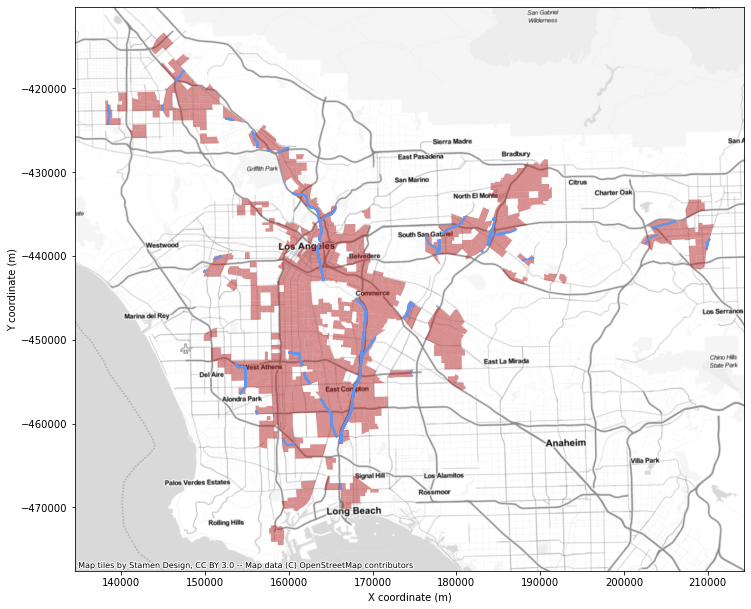

In [52]:
### plot top 10 percentile CES zones along with their impaired rivers
ax1 = ces_t10_la.plot(figsize=(12,12), color='firebrick', alpha=0.5)
waters_join_ces_imp_t10_int_la.plot(ax = ax1, lw=2, color='cornflowerblue')
cx.add_basemap(ax = ax1, crs=roads_prim.crs, source=cx.providers.Stamen.TonerLite)
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')


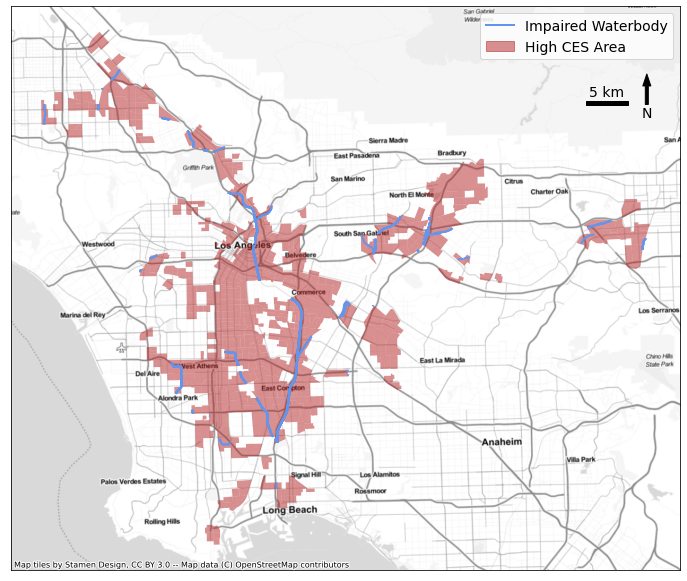

In [58]:
### Adding scale, north arrow, legend, and saving
ax1 = ces_t10_la.plot(figsize=(12,12), color='firebrick', alpha=0.5)
waters_join_ces_imp_t10_int_la.plot(ax = ax1, lw=2, color='cornflowerblue')
cx.add_basemap(ax = ax1, crs=roads_prim.crs, source=cx.providers.Stamen.TonerLite)

# add legend manually
legend_elements = [mlines.Line2D([0], [0], color='cornflowerblue', lw=2, label='Impaired Waterbody'),
                   mpatches.Patch(color='firebrick', alpha=0.5, label='High CES Area')]

ax1.legend(handles=legend_elements, fontsize=14, loc = 'upper right')

#Add north arrow, https://stackoverflow.com/a/58110049/604456
x, y, arrow_length = 0.95, 0.88, 0.07
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=3, headwidth=8),
            ha='center', va='center', fontsize=14,
            xycoords=ax1.transAxes)

#Add scale-bar - note projection is in meters (https://andrewpwheeler.com/2020/06/25/creating-a-basemap-in-python-using-contextily/)
x, y, scale_len, scale_height = 203100, -422000, 5000, 500 #arrowstyle='-'
scale_rect = mpl.patches.Rectangle((x,y), scale_len, scale_height, linewidth=1,edgecolor='k',facecolor='k')
ax1.add_patch(scale_rect)
ax1.text(x+scale_len/2, y+1000, s=str(int(scale_len/1000)) + ' km', fontsize=14, horizontalalignment='center')


## remove ticks and save
plt.xticks([])
plt.yticks([])
plt.savefig('highCES_impaired_la.jpg', bbox_inches='tight', dpi=300)

### Going further
Unfortunately, we only had time to skim the surface of GIS in Python today. But many of the core functionalities of ArcMap have analogues in Python. If you are an ArcMap master and are looking for a particular tool, usually googling "how to do <*tool X*> in Python" will be a great start.

There are two major types of data in GIS. Vector data (aka shapefiles) are points, lines, and polygons with specific spatial attributes. Geopandas is the library for vector data, as we've seen today. But the second type, raster data, requires different tools that we don't have time for today. If you want to learn more, check out the ``rasterio`` and ``earthpy`` packages.